<a href="https://colab.research.google.com/github/jk101102/Data-Project-7/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import files
import pandas as pd
files.upload() # 上傳檔案
pd.read_csv('train.csv')


Saving train.csv to train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
for column in train.columns:
    if train[column].dtype == 'O':
        print(column)
    elif train[column].name == 'SalePrice':
        print(column)
    else:
        train=train.drop(labels=[column],axis='columns')

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition
SalePrice


In [ ]:
train.shape

(1460, 44)

In [ ]:
for column in train.columns:
    if train[column].name == 'SalePrice':
        print(column)
    else:
        train_dum = pd.get_dummies(train)
        pd.DataFrame(train_dum)


SalePrice


In [ ]:
train_dum

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,210000,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,266500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,142125,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
train['MSZoning']=train['MSZoning'].replace({"A":1,"C":2,"FV":3,"I":4,"RH":5,"RL":6,"RP":7,"RM":8,"C (all)":9})
train['Street']=train['Street'].replace({'Grvl':1,'Pave':2})
train['Alley']=train['Alley'].replace({'Grvl':1,'Pave':2})
train=train.fillna(0)
train['LotShape']=train['LotShape'].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
train['LandContour']=train['LandContour'].replace({'Lvl':4,'Bnk':3,'HLS':2,'Low':1})
train['Utilities']=train['Utilities'].replace({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
train['LotConfig']=train['LotConfig'].replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})
train['LandSlope']=train['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1})
train['Neighborhood']=train['Neighborhood'].replace({'Blmngtn':1,'Blueste':2,'BrDale':3,'BrkSide':4,'ClearCr':5,'CollgCr':6,'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10,'MeadowV':11,'Mitchel':12,'NAmes':13,'NoRidge':14,'NPkVill':15,'NridgHt':16,'NWAmes':17,'OldTown':18,'SWISU':19,'Sawyer':20,'SawyerW':21,'Somerst':22,'StoneBr':23,'Timber':24,'Veenker':25})
train['Condition1']=train['Condition1'].replace({'Artery':9,'Feedr':8,'Norm':7,'RRNn':6,'RRAn':5,'PosN':4,'PosA':3,'RRNe':2,'RRAe':1})
train['Condition2']=train['Condition2'].replace({'Artery':9,'Feedr':8,'Norm':7,'RRNn':6,'RRAn':5,'PosN':4,'PosA':3,'RRNe':2,'RRAe':1})
train['BldgType']=train['BldgType'].replace({'1Fam':1,'2fmCon':2,'Duplex':3,'TwnhsE':4,'Twnhs':5})
train['HouseStyle']=train['HouseStyle'].replace({'1Story':1,'1.5Fin':2,'1.5Unf':3,'2Story':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8})
train['RoofStyle']=train['RoofStyle'].replace({'Flat':1,'Gable':2,'Gambrel':3,'Hip':4,'Mansard':5,'Shed':6})
train['RoofMatl']=train['RoofMatl'].replace({'ClyTile':1,'CompShg':2,'Membran':3,'Metal':4,'Roll':5,'Tar&Grv':6,'WdShake':7,'WdShngl':8})
train['Exterior1st']=train['Exterior1st'].replace({'AsbShng':1,'AsphShn':2,'Brk Cmn':3,'BrkComm':3,'BrkFace':4,'CBlock':5,'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17})
train['Exterior2nd']=train['Exterior2nd'].replace({'AsbShng':1,'AsphShn':2,'Brk Cmn':3,'BrkCmn':3,'BrkFace':4,'CBlock':5,'CmentBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Shng':16,'Wd Sdng':16,'WdShing':17})
train['MasVnrType']=train['MasVnrType'].replace({'BrkCmn':1,'BrkFace':2,'CBlock':3,'None':0,'Stone':4})
train['ExterQual']=train['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['ExterCond']=train['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['Foundation']=train['Foundation'].replace({'BrkTil':1,'CBlock':2,'PConc':3,'Slab':4,'Stone':5,'Wood':6})
train['BsmtQual']=train['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['BsmtCond']=train['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['BsmtExposure']=train['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1})
train['BsmtFinType1']=train['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
train['BsmtFinType2']=train['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
train['Heating']=train['Heating'].replace({'Floor':1,'GasA':2,'GasW':3,'Grav':4,'OthW':5,'Wall':6})
train['HeatingQC']=train['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['CentralAir']=train['CentralAir'].replace({'Y':1,'N':0})
train['Electrical']=train['Electrical'].replace({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})
train['KitchenQual']=train['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['Functional']=train['Functional'].replace({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
train['FireplaceQu']=train['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['GarageType']=train['GarageType'].replace({'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2,'Detchd':1})
train['GarageFinish']=train['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1})
train['GarageQual']=train['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['GarageCond']=train['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['PavedDrive']=train['PavedDrive'].replace({'Y':2,'P':1,'N':0})
train['PoolQC']=train['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1})
train['Fence']=train['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1})
train['MiscFeature']=train['MiscFeature'].replace({'Elev':1,'Gar2':2,'Othr':3,'Shed':4,'TenC':5})
train['SaleType']=train['SaleType'].replace({'WD':1,'CWD':2,'VWD':3,'New':4,'COD':5,'Con':6,'ConLw':7,'ConLI':8,'ConLD':9,'Oth':10})
train['SaleCondition']=train['SaleCondition'].replace({'Normal':1,'Abnorml':2,'AdjLand':3,'Alloca':4,'Family':5,'Partial':6})


In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


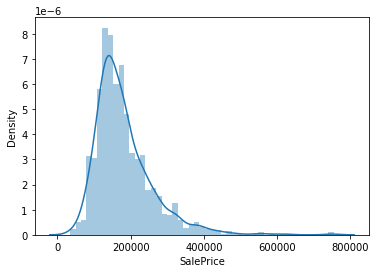

In [ ]:
sns.distplot(train['SalePrice']);

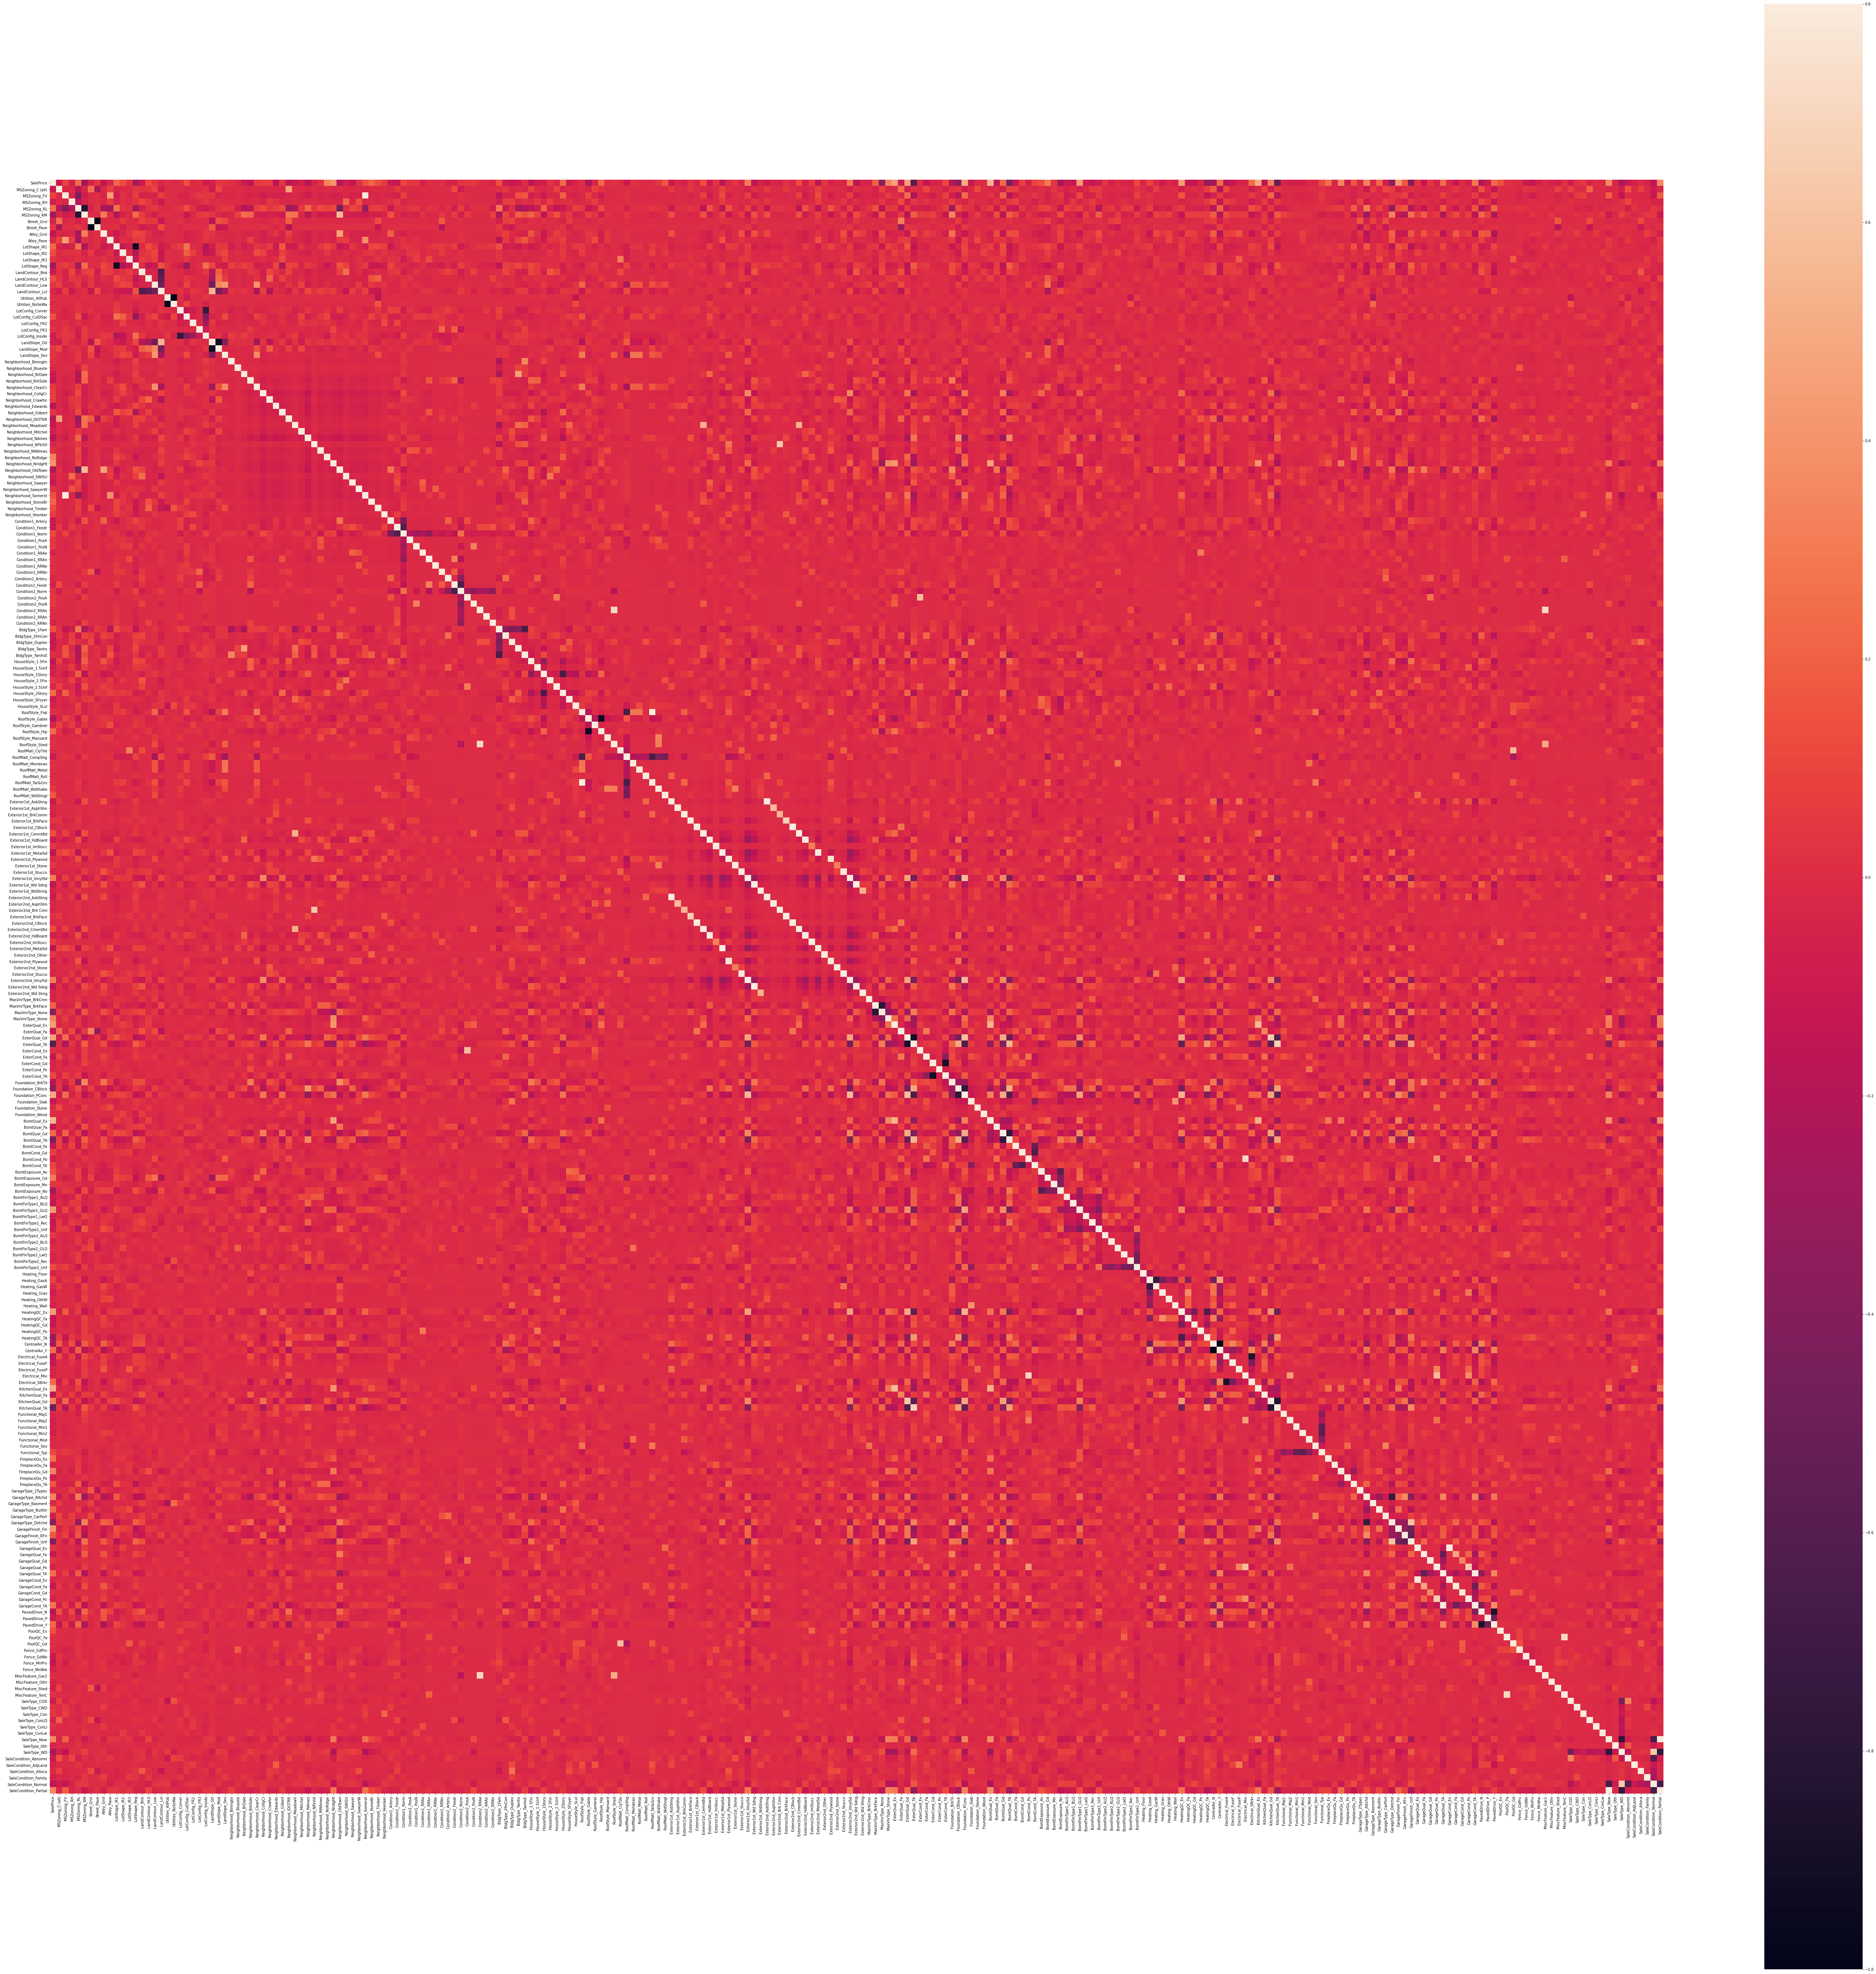

In [ ]:
corrmat = train_dum.corr()
f, ax = plt.subplots(figsize=(100,100))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
for column in train.columns:
  if train[column].dtype =='O':
    train[column] = train[column].fillna('None')
  else:
    train[column] = train[column].fillna('0')

In [ ]:
print(column)

SalePrice
